# MATPLOTLIB PIE PLOTS

- colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

<a id='TOP'></a>

In [2]:
import numpy as np
import pandas as pd
from numpy.random import randint
import matplotlib.pyplot as plt
%matplotlib inline

## TABLE OF CONTENTS

* <a href='#PIE PLOT'>PIE PLOT</a>
* <a href='#NESTED PIE PLOT'>NESTED PIE PLOT</a>
* <a href='#PIE PLOT: SETTING LEGEND'>PIE PLOT: SETTING LEGEND</a>
* <a href='#PIE PLOT: SETTING ANNOTATIONS'>PIE PLOT: SETTING ANNOTATIONS</a>


***


<a id='GENERATE SOME DATA'></a>

# GENERATE SOME DATA

In [3]:
X = np.linspace(1,10,20)
X

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [4]:
y = randint(1,50,20)
y

array([ 6,  5, 47, 31,  8, 13,  4, 27, 12, 24, 40, 20, 39, 27, 19, 22, 38,
       11, 16, 10])

In [5]:
X.size, y.size

(20, 20)

<a id='LINE PLOT'></a>

# PIE PLOT
- colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

### <a href='#TOP'>BACK TO TOP</a>
***

In [6]:
labels = ['a','b','c','d']
sizes = [15,20,20,25]

***
*TIP: In order to put more enphasis on group use explode parameter. Takes list of values for each label that will explode the given group*
***
*TIP: https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Wedge.html#matplotlib.patches.Wedge for wedgeprops*
***
*TIP: https://matplotlib.org/stable/tutorials/colors/colormaps.html for colormaps*
***


In [7]:
# SETTING A COLOR MAP
colormap = plt.cm.flag
numberOfSlices = len(labels)
sliceColors = colormap(np.linspace(0., 1., numberOfSlices))

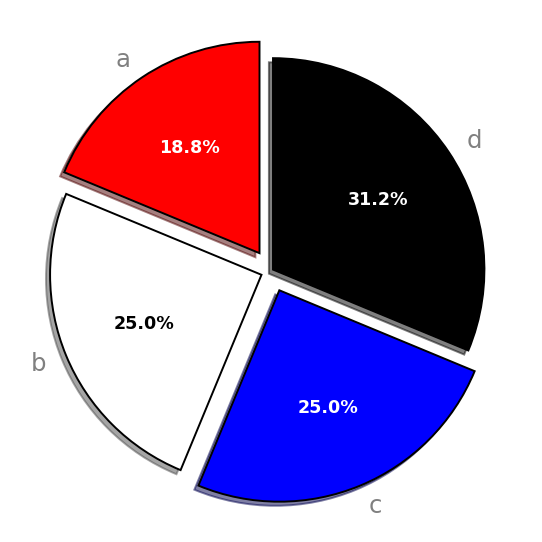

In [28]:
fig, axes = plt.subplots(figsize=(10,10), dpi=70)
explode = (0.1,0.05,0.1,0.01)
patches, texts, autotexts = axes.pie(sizes
         , labels=labels
         , autopct='%1.1f%%'
         , shadow=True
         , startangle=90
         , explode=explode
         , colors=sliceColors
         , wedgeprops = {'linewidth': 2, 'edgecolor': 'k'}
         , textprops = {'fontsize':25, 'color':'grey'})

plt.setp(autotexts, size =18, color='w',weight="bold")
autotexts[1].set_color('black')

plt.show()

## Good read on dpi: https://stackoverflow.com/questions/47633546/relationship-between-dpi-and-figure-size

>**Figure size (figsize)** determines the size of the figure in inches. This gives the amount of space the axes (and other elements) have inside the figure. **The default figure size is (6.4, 4.8) inches in matplotlib 2**. A larger figure size will allow for longer texts, more axes or more ticklabels to be shown.

>**Dots per inches (dpi)** determines how many pixels the figure comprises. The default dpi in matplotlib is 100. A figure of figsize=(w,h) will have

> `px, py = w*dpi, h*dpi  # pixels`
>e.g.
6.4 inches * 100 dpi = 640 pixels
So in order to obtain a figure with a pixel size of e.g. (1200,600) you may chose several combinations of figure size and dpi, e.g.

> `figsize=(15,7.5), dpi= 80
figsize=(12,6)  , dpi=100
figsize=( 8,4)  , dpi=150
figsize=( 6,3)  , dpi=200`

>**Now, what is the difference? 
This is determined by the size of the elements inside the figure. Most elements like lines, markers, texts have a size given in points.
Matplotlib figures use Points per inch (ppi) of 72. A line with thickness 1 point will be 1./72. inch wide. A text with fontsize 12 points will be 12./72. inch heigh.**

>Of course if you change the figure size in inches, points will not change, so a larger figure in inches still has the same size of the elements. Changing the figure size is thus like taking a piece of paper of a different size. Doing so, would of course not change the width of the line drawn with the same pen.

>On the other hand, changing the dpi scales those elements. At 72 dpi, a line of 1 point size is one pixel strong. At 144 dpi, this line is 2 pixels strong. A larger dpi will therefore act like a magnifying glass. All elements are scaled by the magnifying power of the lens.

<a id='NESTED PIE PLOT'></a>

# NESTED PIE PLOT

### <a href='#TOP'>BACK TO TOP</a>
***

In [33]:
#Generate some data
vals = np.array([[60,32],[35,20],[26,36]])
vals_sum = vals.sum(axis=1)
vals_flat = vals.flatten()

In [167]:
#Get color mapping
cmap = plt.get_cmap('viridis')
outer_colors = cmap(np.arange(len(vals_sum))*randint(1,10,1))
inner_colors = cmap(np.arange(len(vals_flat))*np.linspace(0., 1., len(vals_flat)), alpha=0.8)
center_colors = cmap(np.linspace(0., 1., len(vals_sum)), alpha=0.5)

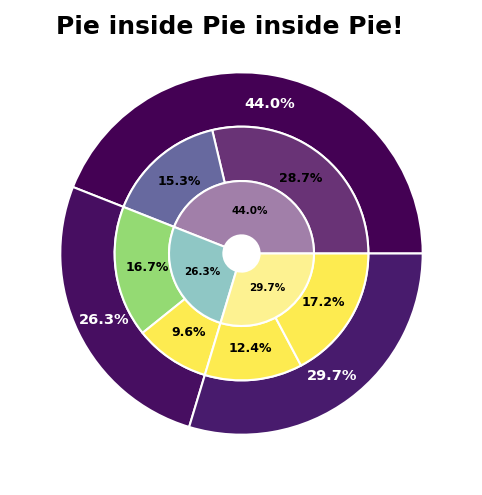

In [365]:
fig, ax = plt.subplots(dpi=150)
fig.suptitle('Pie inside Pie inside Pie!',y=0.9,weight='bold')

size=0.3

ax.pie(vals_sum
       , radius=1
       , colors=outer_colors
       , wedgeprops=dict(width=size, edgecolor='w')
       , autopct='%1.1f%%'
       , pctdistance=0.84
       , textprops = dict(fontsize=7,color='w',weight='bold'))

ax.pie(vals_flat
       , radius=1-size
       , colors=inner_colors
       , wedgeprops=dict(width=size, edgecolor='w')
       , autopct='%1.1f%%'
       , pctdistance=0.75
       , textprops = dict(fontsize=6,color= 'k',weight='bold'))
ax.pie(vals_sum
       , radius=1-size*2
       , colors=center_colors
       , wedgeprops=dict(width=size, edgecolor='w')
       , autopct='%1.1f%%'
       , pctdistance=0.6
       , textprops = dict(fontsize=5,color= 'k',weight='bold')
      )

plt.show()

<a id='PIE PLOT: SETTING LEGEND'></a>

# PIE PLOT: SETTING LEGEND

### <a href='#TOP'>BACK TO TOP</a>
***

In [261]:
#Generate Data
recipe = ["500 g Flour",
          "375 g Water",
          "12 g Salt",
          "10 g Yest",
          "25 g SundriedTomatoes"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]

In [221]:
#Setup colormap
cmap = plt.get_cmap('Wistia')
colors = cmap(np.linspace(0., 1., len(ingredients)), alpha=1)

In [352]:
#Function for autopct. Conditional removal at the end if value is too small.
def func_pie(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

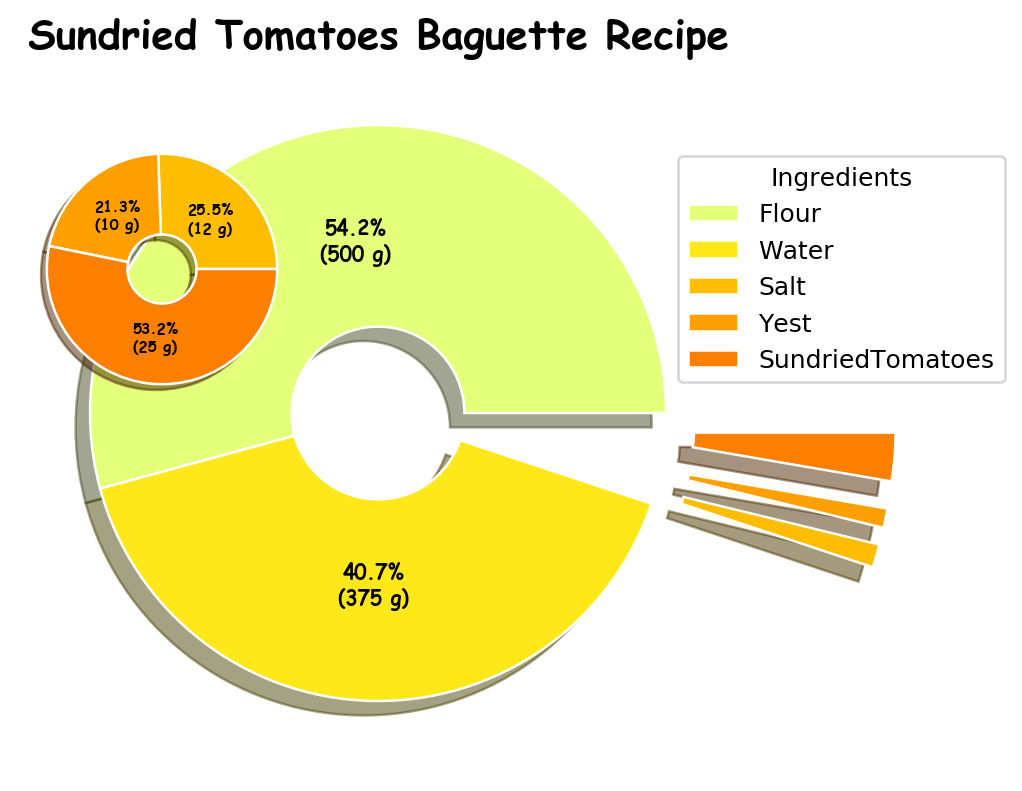

In [361]:
fig = plt.figure(dpi=180)
fig.suptitle('Sundried Tomatoes Baguette Recipe', fontsize=16, weight='bold', family='fantasy', y=1.05)
explode = [0,0,0.8,0.8,0.8]

ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.1,0.5,0.4,0.4])

wedges, texts, autotexts = ax1.pie(data
                                  , autopct=lambda pct: func_pie(pct, data) if pct > 10 else ''
                                  , textprops=dict(color="k", fontsize=8, weight='bold', family='fantasy')
                                  , wedgeprops=dict(width=0.7, edgecolor='w')
                                  , explode=explode
                                  , shadow = True
                                  , colors=colors)

ax1.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(0.9, 0.2, 1, 1))


wedges, texts, autotexts = ax2.pie(data[2:]
                                  , autopct=lambda pct: func_pie(pct, data[2:])
                                  , textprops=dict(color="k", fontsize=6, weight='bold', family='fantasy')
                                  , wedgeprops=dict(width=0.7, edgecolor='w')
                                  , shadow = True
                                  , colors=colors[2:])


***

<a id='PIE PLOT: SETTING ANNOTATIONS'></a>

# PIE PLOT: SETTING ANNOTATIONS

### <a href='#TOP'>BACK TO TOP</a>
***

In [81]:
#Generate Data
recipe = ["500 g Flour",
          "25 g SundriedTomatoes",
          "375 g Water",
          "12 g Salt",
          "10 g Yest",
          ]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]

In [31]:
#Setup colormap
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0., 1., len(ingredients)), alpha=1)

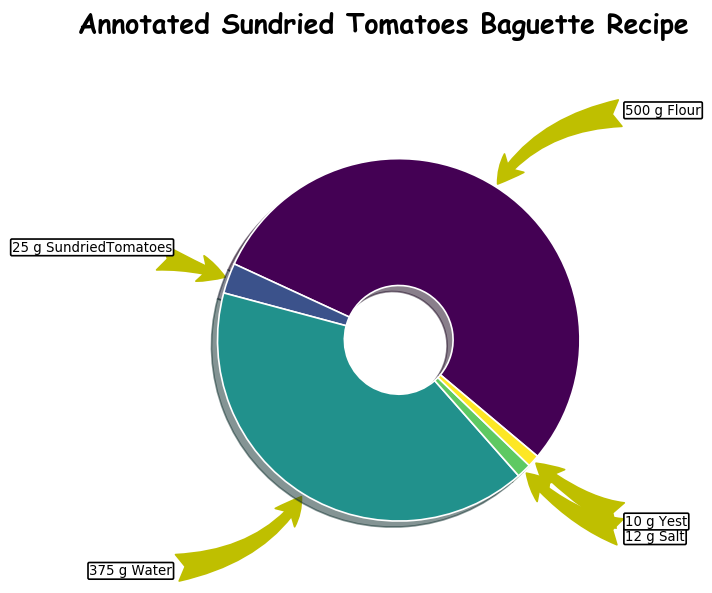

In [152]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=120, subplot_kw=dict(aspect="equal"))
fig.suptitle('Annotated Sundried Tomatoes Baguette Recipe', fontsize=16, weight='bold', family='fantasy', y=1.05)

wedges, texts = ax.pie(data
                       , wedgeprops=dict(width=0.7, linewidth=1, edgecolor='w')
                       , startangle=-40
                       , colors=colors
                       , textprops=dict(color="k", fontsize=2, weight='bold', family='fantasy')
                       , shadow=True)

bbox_props = dict(boxstyle="Round,pad=.1", fc="w", ec="k", lw=1)
kw = dict(arrowprops=dict(arrowstyle="fancy",linewidth=1, mutation_scale=40, color='y'),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    #find a center point of angle
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    #or like this
    ang1 = (p.theta2 + p.theta1)/2
    
    #https://www.youtube.com/watch?v=aHaFwnqH5CU&ab_channel=Mathispower4u
    #find point at that angle on the circumference,
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    #Check if x is negative or positive for alignment
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle3,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.5*y),
                horizontalalignment=horizontalalignment, **kw, size=8)

plt.show()

***